# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pd.options.display.float_format = '{:.2f}'.format

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
app_train['CNT_CHILDREN'].describe()

count   307511.00
mean         0.42
std          0.72
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         19.00
Name: CNT_CHILDREN, dtype: float64

In [6]:
#1
cut_rule = [0,0.1,2,5,99]
labels = ['子女數0', '子女數1~2', '子女數3~5', '子女數5以上']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule,labels = labels, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

子女數0      215371
子女數1~2     87868
子女數3~5      4230
子女數5以上        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [7]:
app_train.loc[app_train.CNT_CHILDREN == 19, ['CNT_CHILDREN', 'CNT_CHILDREN_GROUP']].head()

,CNT_CHILDREN,CNT_CHILDREN_GROUP
155369,19,子女數5以上
265784,19,子女數5以上


In [8]:
#2-1
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
子女數0                0        166747.01
                    1        160804.21
子女數1~2              0        174590.58
                    1        176115.36
子女數3~5              0        175053.74
                    1        160677.39
子女數5以上              0        139159.09
                    1        180000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [9]:
grouped_df.describe()

count      mean        std      min       25%  \
CNT_CHILDREN_GROUP TARGET                                                     
子女數0               0      198762.00 166747.01  106179.91 25650.00 112500.00   
                   1       16609.00 160804.21   84830.11 25650.00 112500.00   
子女數1~2             0       80081.00 174590.58  120198.14 26550.00 112500.00   
                   1        7787.00 176115.36 1327158.66 27900.00 112500.00   
子女數3~5             0        3810.00 175053.74  112842.70 29250.00 112500.00   
                   1         420.00 160677.39  113031.46 36000.00  96750.00   
子女數5以上             0          33.00 139159.09   71124.83 45000.00  90000.00   
                   1           9.00 180000.00   73771.18 90000.00 135000.00   

                                50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                   
子女數0               0      144000.00 202500.00  13500000.00  
                   1      135000.00 202500.00   1890000.00  
子女數1~2             0      157500.00 211500.00  18000090.00  
                   1      135000.00 202500.00 117000000.00  
子女數3~5             0      157500.00 202500.00   2250000.00  
                   1      135000.00 185625.00   1350000.00  
子女數5以上             0      112500.00 180000.00    337500.00  
                   1      180000.00 202500.00    315000.00

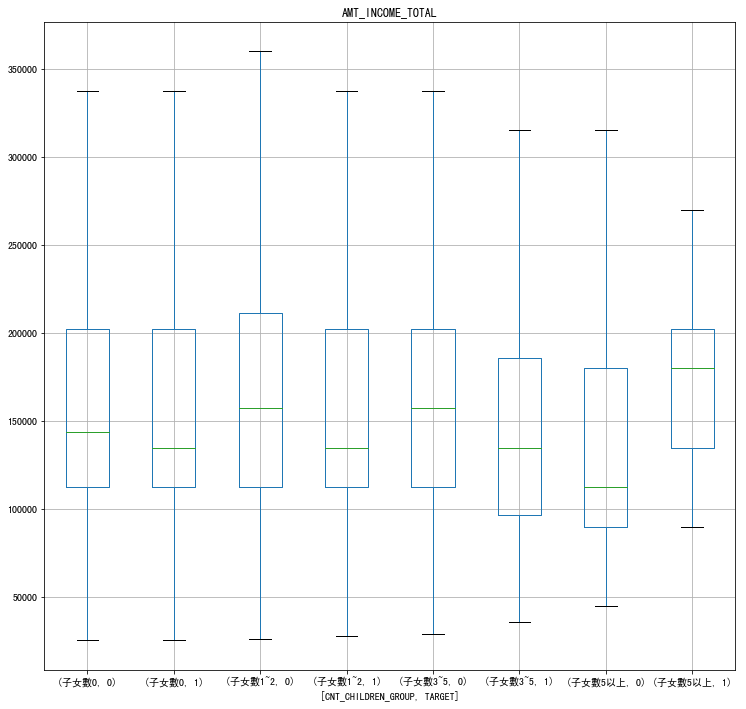

In [10]:
#2-2
plt_column = ['AMT_INCOME_TOTAL']
plt_by = grp # ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column = plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [11]:
#3
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: ((x - x.mean())/ x.std()))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.00,0.49
1,270000.00,0.97
2,67500.00,-0.93
3,135000.00,-0.30
4,121500.00,-0.43
